In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
# Loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizing the input data to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [3]:
# RNN model parameters
input_shape = (28, 28)  # Each image is 28x28, we treat this as 28 time steps with 28 features
num_classes = 10  # 10 digits (0-9)

In [4]:
model = models.Sequential()

model.add(layers.LSTM(128, input_shape=input_shape)) # Adding an LSTM layer with 128 units
model.add(layers.Dense(64, activation='relu')) # Adding a Fully connected layer

model.add(layers.Dense(num_classes, activation='softmax')) # Output layer

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
938/938 [==============================] - 32s 31ms/step - loss: 0.4081 - accuracy: 0.8672 - val_loss: 0.1416 - val_accuracy: 0.9559
Epoch 2/5
938/938 [==============================] - 29s 31ms/step - loss: 0.1242 - accuracy: 0.9618 - val_loss: 0.0889 - val_accuracy: 0.9726
Epoch 3/5
938/938 [==============================] - 30s 32ms/step - loss: 0.0854 - accuracy: 0.9742 - val_loss: 0.0839 - val_accuracy: 0.9747
Epoch 4/5
938/938 [==============================] - 29s 31ms/step - loss: 0.0671 - accuracy: 0.9798 - val_loss: 0.0680 - val_accuracy: 0.9795
Epoch 5/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0550 - accuracy: 0.9836 - val_loss: 0.0616 - val_accuracy: 0.9812


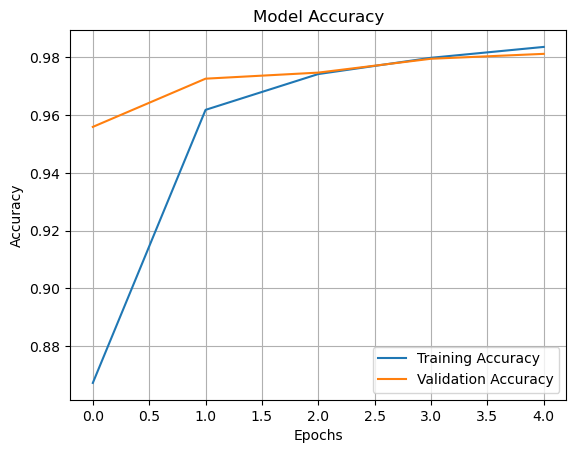

In [7]:
import matplotlib.pyplot as plt

# Plotting function
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_accuracy(history)

In [8]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 [==============================] - 3s 9ms/step - loss: 0.0616 - accuracy: 0.9812
Test accuracy: 0.9812
